# **Fix Overfitting with Regularization**

There are two ways to approach an overfit model:
1. Reduce overfitting by training the network on more examples. 
2. Reduce overfitting by changing the complexity of the network.
  - Change network complexity by changing the network structure (number of weights).
  - Change network complexity by changing the network parameters (values of weights).

Activity Regularization: 
- Penalize the model during training based on the magnitude of the activations (Chapter 14).
- Weight Constraint: Constrain the magnitude of weights to be within a range or below a limit (Chapter 15).
- Dropout: Probabilistically remove inputs during training (Chapter 16).
- Noise: Add statistical noise to inputs during training (Chapter 17).
- Early Stopping: Monitor model performance on a validation set and stop training when performance degrades (Chapter 18).

In [5]:
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

# **1. Weight Regularization**

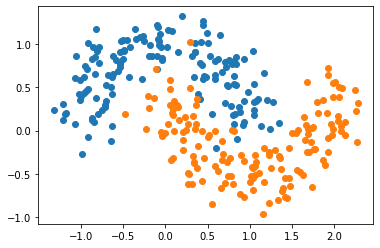

In [7]:
# scatter plot of moons dataset
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from numpy import where
# generate 2d classification dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=1)
# scatter plot for each class value
for class_value in range(2):
  # select indices of points with the class label
  row_ix = where(y == class_value)
  # scatter plot for points with a different color
  plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
plt.show()

## 1.1. Overfit Multilayer Perceptron Model

Train: 1.000, Test: 0.944


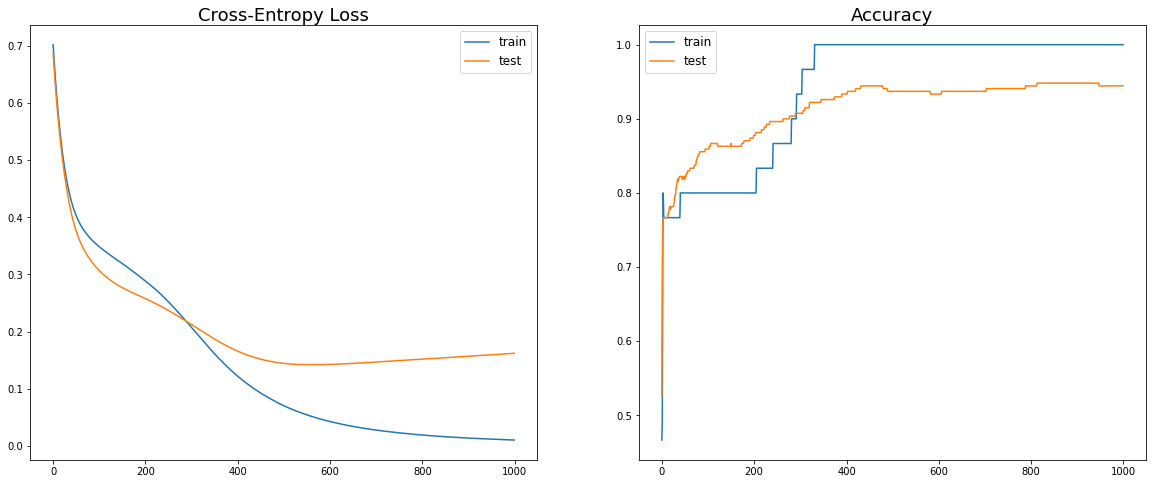

In [6]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# generate 2d classification dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=1)

# split into train and test sets
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
np.random.seed(42)
tf.random.set_seed(42)
history = model.fit(trainX, trainy, epochs=1000, validation_data=(testX, testy), verbose=0) 

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 18)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 18)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(fontsize = 12)
plt.show()

## 1.2. MLP Model With Weight Regularization

Train: 1.000, Test: 0.944


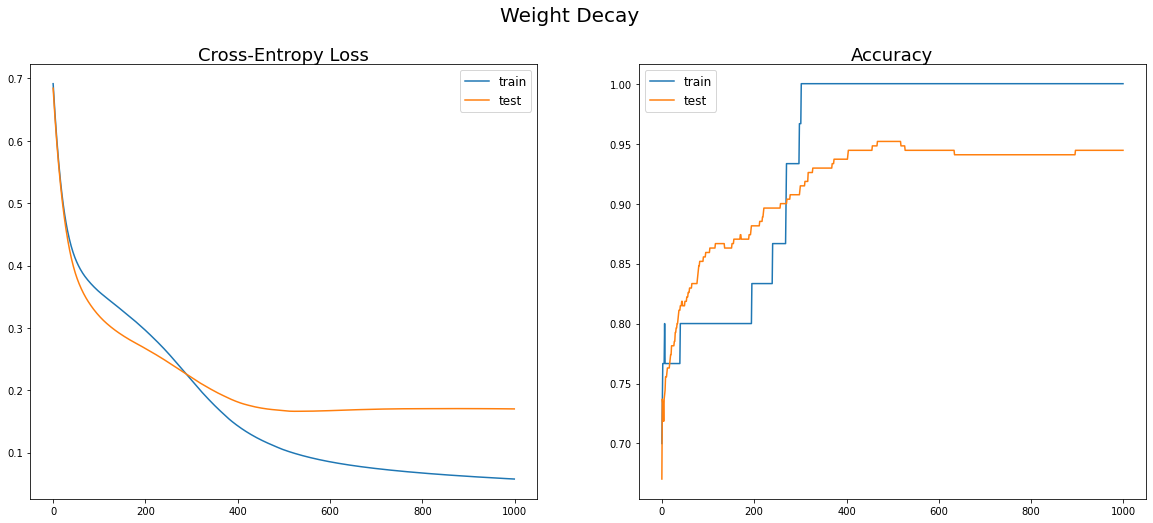

In [8]:
# mlp with weight regularization for the moons dataset
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
import matplotlib.pyplot as plt

# generate 2d classification dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=1)
# split into train and test sets
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.001))) 
#make weight decay
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# fit model
np.random.seed(42)
tf.random.set_seed(42)
history = model.fit(trainX, trainy, epochs=1000, validation_data=(testX, testy), verbose=0) 
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.figure(figsize = (20,8))
plt.suptitle("Weight Decay", fontsize = 20)
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 18)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 18)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(fontsize = 12)
plt.show()

## 1.3. Grid Search Regularization Hyperparameter


Param: 0.100000, Train: 1.000, Test: 0.937
Param: 0.010000, Train: 1.000, Test: 0.941
Param: 0.001000, Train: 1.000, Test: 0.944
Param: 0.000100, Train: 1.000, Test: 0.948
Param: 0.000010, Train: 1.000, Test: 0.948
Param: 0.000001, Train: 1.000, Test: 0.952


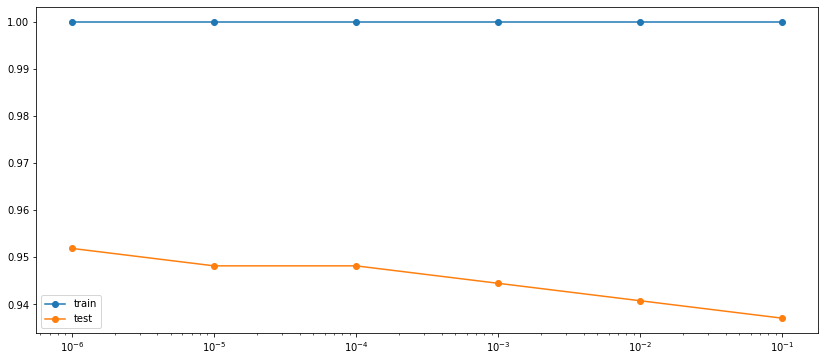

In [10]:
# grid search regularization values for moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l2
# generate 2d classification dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# grid search values
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()

np.random.seed(42)
tf.random.set_seed(42)
for param in values:
  # define model
  model = Sequential()
  model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(param))) 
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  # fit model
  model.fit(trainX, trainy, epochs=4000, verbose=0)
  # evaluate the model
  _, train_acc = model.evaluate(trainX, trainy, verbose=0)
  _, test_acc = model.evaluate(testX, testy, verbose=0)
  print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc)) 
  all_train.append(train_acc)
  all_test.append(test_acc)

# plot train and test means
plt.figure(figsize = (14,6))
plt.semilogx(values, all_train, label='train', marker='o') 
plt.semilogx(values, all_test, label='test', marker='o') 
plt.legend()
plt.show()

## 1.4. Extensions

- **Try Alternates**. Update the example to use L1 or the combined L1L2 methods instead
of L2 regularization.
- **Report Weight Norm**. Update the example to calculate the magnitude of the network weights and demonstrate that regularization indeed made the magnitude smaller.
- **Regularize Output Layer**. Update the example to regularize the output layer of the model and compare the results.
- **Regularize Bias**. Update the example to regularize the bias weight and compare the results.
- **Repeated Model Evaluation**. Update the example to fit and evaluate the model multiple times and report the mean and standard deviation of model performance.
- **Grid Search Along Order of Magnitude**. Update the grid search example to grid search within the best-performing order of magnitude of parameter values.
- **Repeated Regularization of Model**. Create a new example to continue the training of a fit model with increasing levels of regularization (e.g. 1E-6, 1E-5, etc.) and see if it results in a better performing model on the test set.


# **2. Sparse Representations with Activity Regularization**

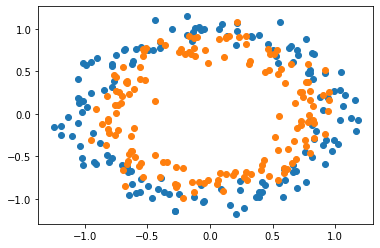

In [12]:
# scatter plot of circles dataset
from sklearn.datasets import make_circles
from numpy import where
# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.1, random_state=1)
# scatter plot for each class value
for class_value in range(2):
  # select indices of points with the class label
  row_ix = where(y == class_value)
  # scatter plot for points with a different color
  plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
plt.show()

## 2.1. Overfit Multilayer Perceptron

Train: 1.000, Test: 0.589


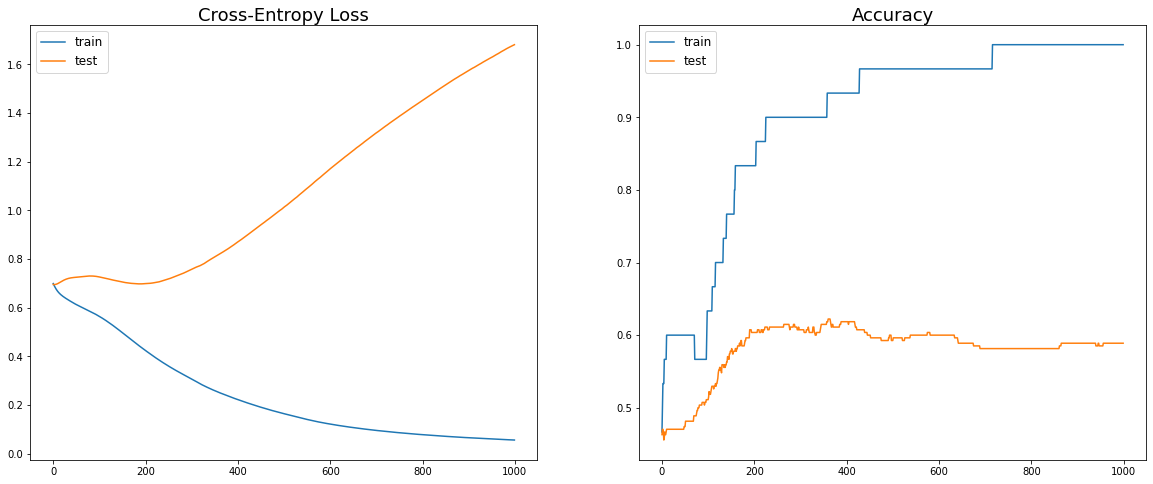

In [16]:
# mlp overfit on the two circles dataset
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential

# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#seed
np.random.seed(42)
tf.random.set_seed(42)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=1000, verbose=0) 
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 18)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 18)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(fontsize = 12)
plt.show()

## 2.2. MLP With Activation Regularization

### 2.2.1. Before activation

Train: 1.000, Test: 0.585


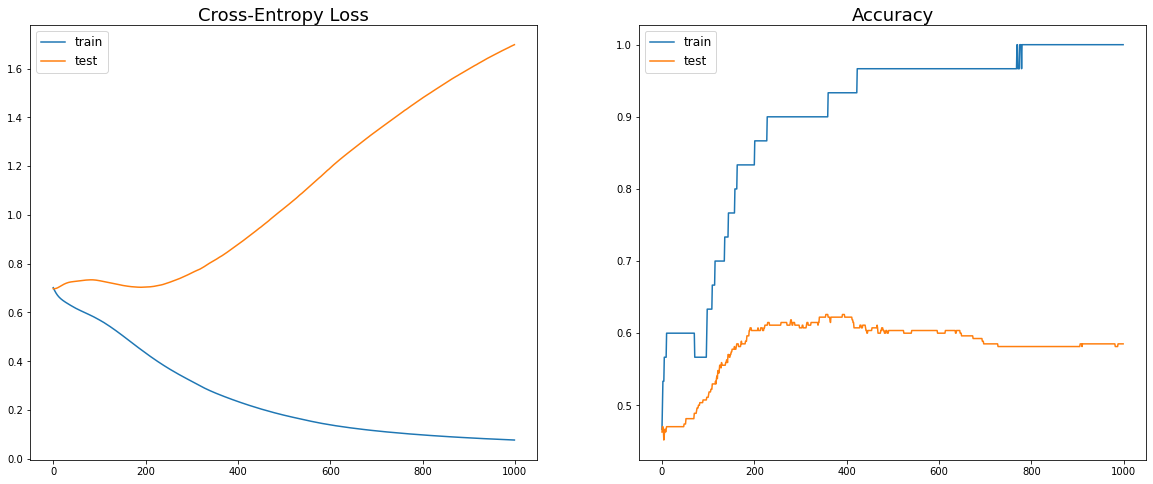

In [17]:
# mlp overfit on the two circles dataset with activation regularization before activation
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from keras.layers import Activation

# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=1)

# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='linear', activity_regularizer=l1(0.0001))) 
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#seed
np.random.seed(42)
tf.random.set_seed(42)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=1000, verbose=0) 
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 18)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 18)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(fontsize = 12)
plt.show()

### 2.2.2. After activation

Train: 1.000, Test: 0.574


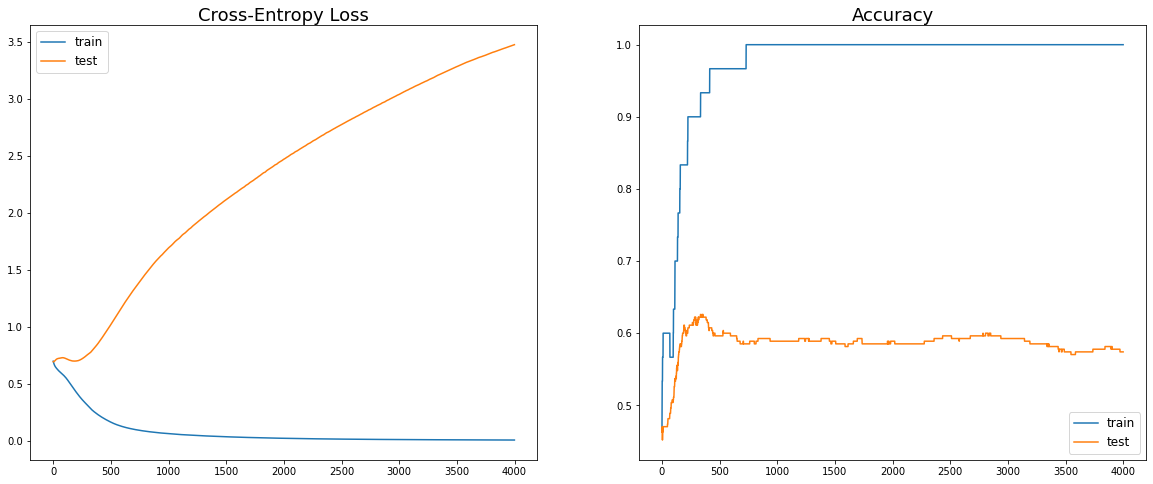

In [19]:
# mlp overfit on the two circles dataset with activation regularization after activation
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', activity_regularizer=l1(0.0001))) 
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#seed
np.random.seed(42)
tf.random.set_seed(42)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0) 
_, test_acc = model.evaluate(testX, testy, verbose=0) 
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc)) # plot loss learning curves
# plot loss learning curves
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 18)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 18)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(fontsize = 12)
plt.show()

## 2.3. Grid Search Regularization Hyperparameter

Param: 0.100000, Train: 0.533, Test: 0.496
Param: 0.010000, Train: 0.867, Test: 0.626
Param: 0.001000, Train: 0.967, Test: 0.596
Param: 0.000100, Train: 1.000, Test: 0.585
Param: 0.000010, Train: 1.000, Test: 0.581
Param: 0.000001, Train: 1.000, Test: 0.589


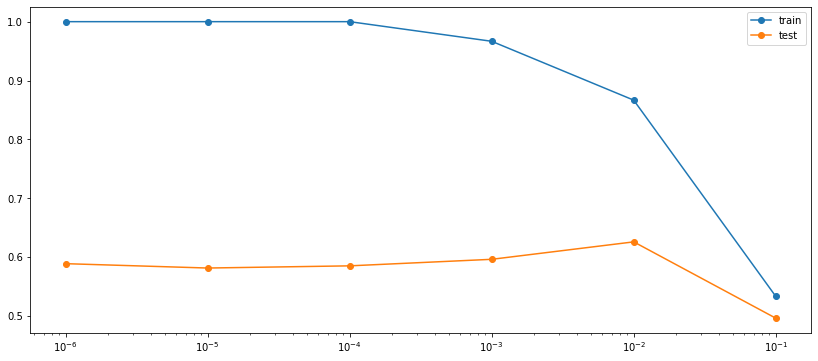

In [21]:
# grid search values
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()
#seed
np.random.seed(42)
tf.random.set_seed(42)
for param in values:
  # define model
  model = Sequential()
  model.add(Dense(500, input_dim=2, activation='relu', activity_regularizer=l1(param))) 
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  # fit model
  model.fit(trainX, trainy, epochs=1000, verbose=0)
  # evaluate the model
  _, train_acc = model.evaluate(trainX, trainy, verbose=0)
  _, test_acc = model.evaluate(testX, testy, verbose=0)
  print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc)) 
  all_train.append(train_acc)
  all_test.append(test_acc)

# plot train and test means
plt.figure(figsize = (14,6))
plt.semilogx(values, all_train, label='train', marker='o') 
plt.semilogx(values, all_test, label='test', marker='o') 
plt.legend()
plt.show()

## Extensions
- **Report Activation Mean**. Update the example to calculate the mean activation of the regularized layer and confirm that indeed the activations have been made more sparse.
- **Grid Search**. Update the example to grid search different values for the regularization hyperparameter.
- **Alternate Norm**. Update the example to evaluate the L2 or L1 and L2 vector norm for regularizing the hidden layer outputs.
- **Repeated Evaluation**. Update the example to fit and evaluate the model multiple times and report the mean and standard deviation of model performance.

# **3. Force Small Weights with Weight Constraints**

## 3.1. Weight Constraints in Keras

- **Maximum norm (max norm)**: to force weights to have a magnitude at or below a given limit.
- **Non-negative norm (non neg)**: to force weights to have a positive magnitude.
- **Unit norm (unit norm)**: to force weights to have a magnitude of 1.0.
- **Min-Max norm (min max norm)**: to force weights to have a magnitude between a range.

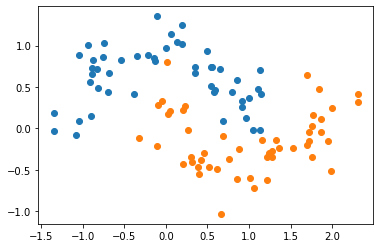

In [ ]:
# scatter plot of moons dataset
from sklearn.datasets import make_moons
from matplotlib import plt
from numpy import where
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# scatter plot for each class value
for class_value in range(2):
  # select indices of points with the class label
  row_ix = where(y == class_value)
  # scatter plot for points with a different color
  plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
plt.show()

## 3.2. Overfit Multilayer Perceptron

Train: 1.000, Test: 0.914


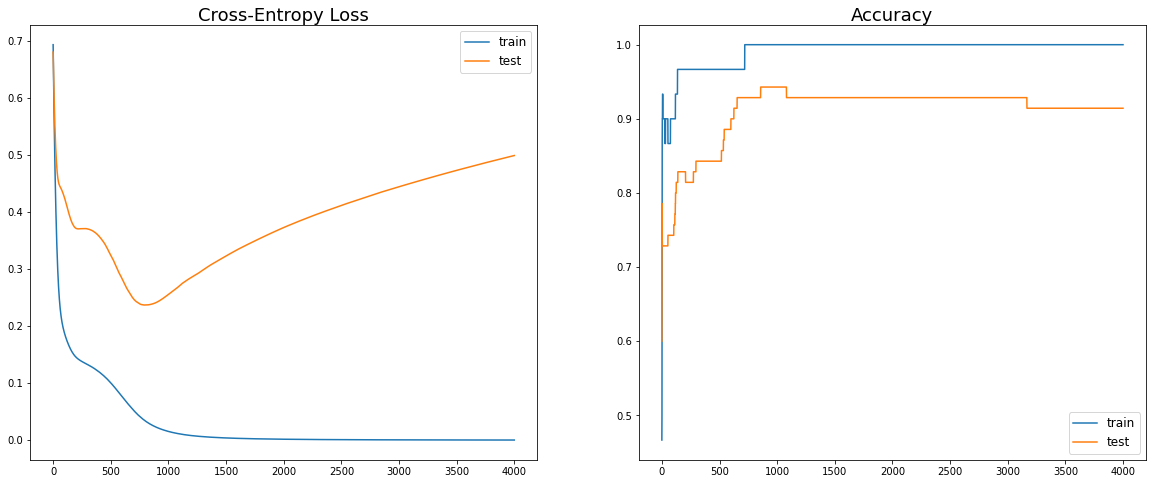

In [ ]:
# mlp overfit on the moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import plt
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#seed
np.random.seed(42)
tf.random.set_seed(42)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0) 

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 18)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 18)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(fontsize = 12)
plt.show()

## 3.3. Overfit MLP With Weight Constraint

Train: 1.000, Test: 0.943


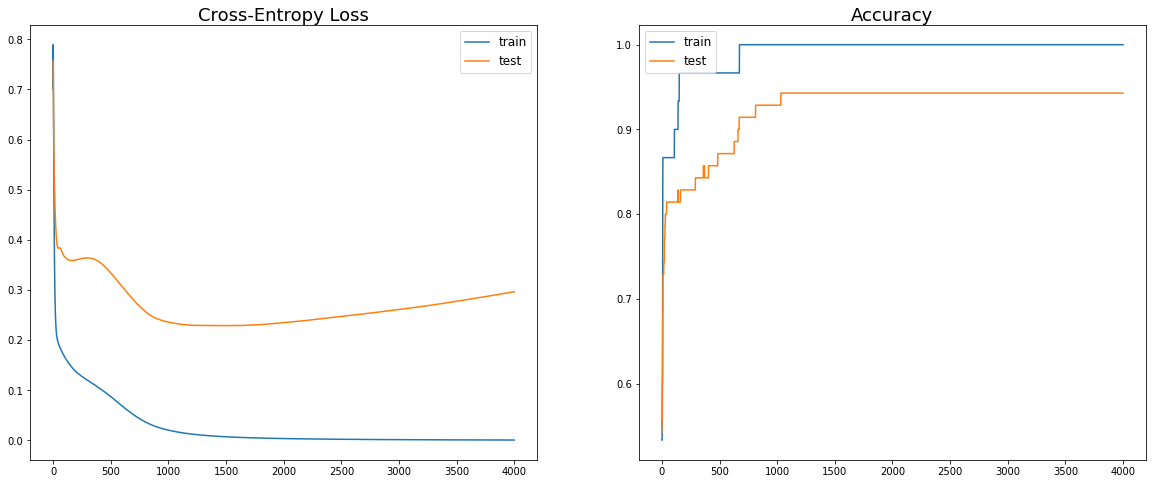

In [ ]:
# mlp overfit on the moons dataset with a unit norm constraint
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from keras.constraints import unit_norm
from matplotlib import plt
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=unit_norm())) 
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#seed
np.random.seed(42)
tf.random.set_seed(42)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0) 
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 18)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 18)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(fontsize = 12)
plt.show()

## 3.4. Extensions

- **Report Weight Norm**. Update the example to calculate the magnitude of the unit weights and demonstrate that the constraint indeed made the magnitude smaller.
- **Constrain Output Layer**. Update the example to add a constraint to the output layer of the model and compare the results.
- **Constrain Bias**. Update the example to add a constraint to the bias weight and compare the results.
- **Repeated Evaluation**. Update the example to fit and evaluate the model multiple times and report the mean and standard deviation of model performance.


# **4. Decouple Layers with Dropout**

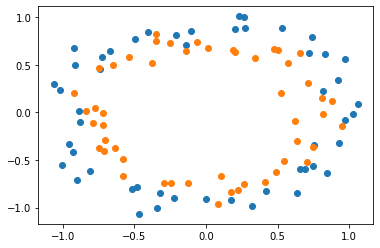

In [ ]:
# scatter plot of circles dataset
from sklearn.datasets import make_circles
from matplotlib import plt
from numpy import where
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# scatter plot for each class value
for class_value in range(2):
  # select indices of points with the class label
  row_ix = where(y == class_value)
  # scatter plot for points with a different color
  plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
plt.show()

## 4.1. Overfit Multilayer Perceptron


Train: 1.000, Test: 0.771


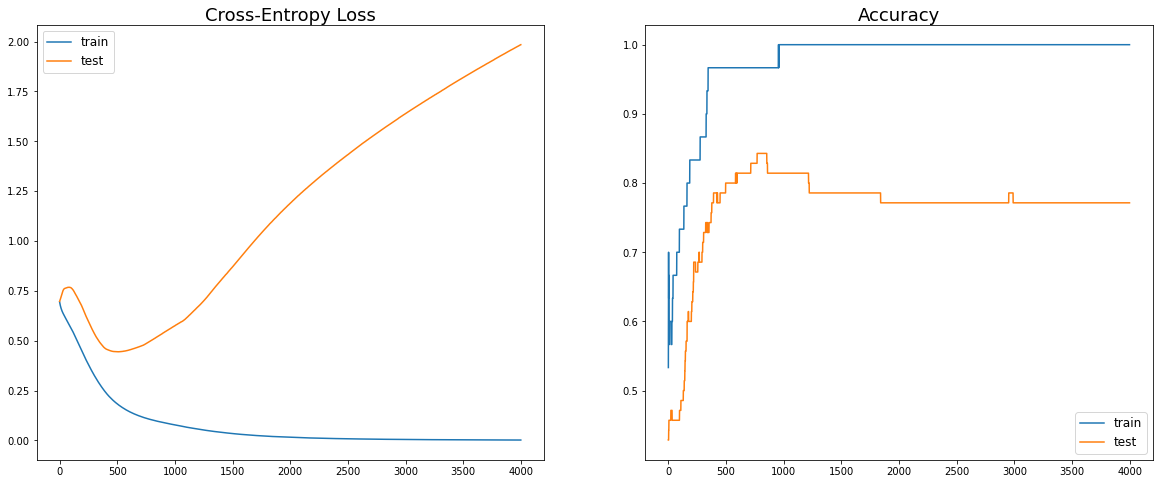

In [ ]:
# mlp overfit on the two circles dataset
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import plt
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#seed
np.random.seed(42)
tf.random.set_seed(42)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0) 
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 18)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 18)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(fontsize = 12)
plt.show()

## 4.2. MLP With Dropout Regularization

Train: 0.967, Test: 0.757


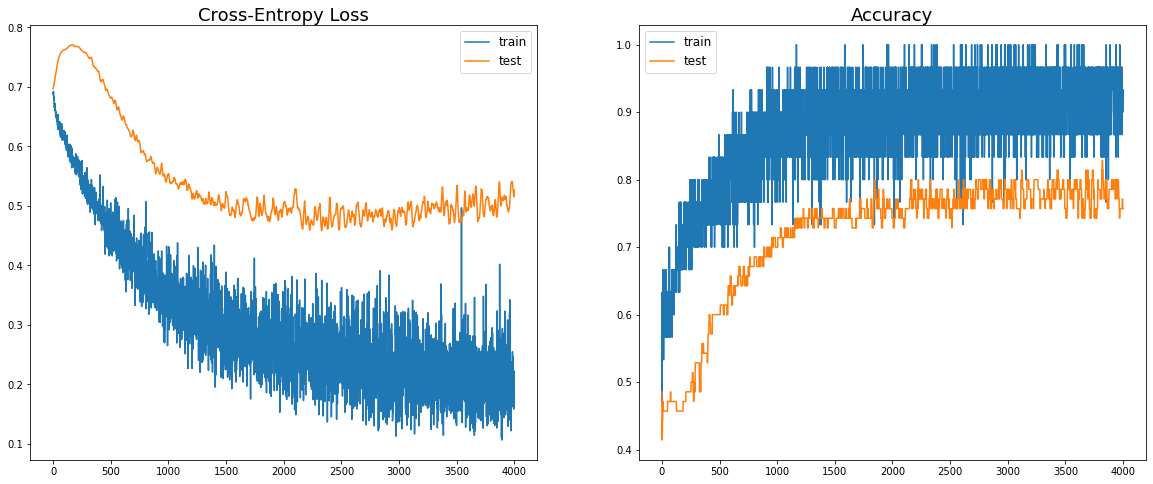

In [ ]:
# mlp with dropout on the two circles dataset
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from matplotlib import plt
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#seed
np.random.seed(42)
tf.random.set_seed(42)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0) 
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 18)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 18)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(fontsize = 12)
plt.show()

## 4.3. Extensions
- **Input Dropout**. Update the example to use dropout on the input variables and compare results.
- **Weight Constraint**. Update the example to add a max-norm weight constraint to the hidden layer and compare results.
- **Repeated Evaluation**. Update the example to repeat the evaluation of the overfit and dropout model and summarize and compare the average results.
- **Grid Search Rate**. Develop a grid search of dropout probabilities and report the relationship between dropout rate and test set accuracy.

# **5. Promote Robustness with Noise**

- Add noise to activations, i.e. the outputs of each layer.
- Add noise to weights, i.e. an alternative to the inputs.
- Add noise to the gradients, i.e. the direction to update weights. 
- Add noise to the outputs, i.e. the labels or target variables.

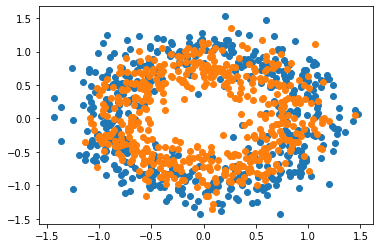

In [ ]:
# scatter plot of circles dataset
from sklearn.datasets import make_circles
from matplotlib import plt
from numpy import where
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.2, random_state=1)
# scatter plot for each class value
for class_value in range(2):
  # select indices of points with the class label
  row_ix = where(y == class_value)
  # scatter plot for points with a different color
  plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
plt.show()

## 5.1. Overfit Multilayer Perceptron


Train: 1.000, Test: 0.548


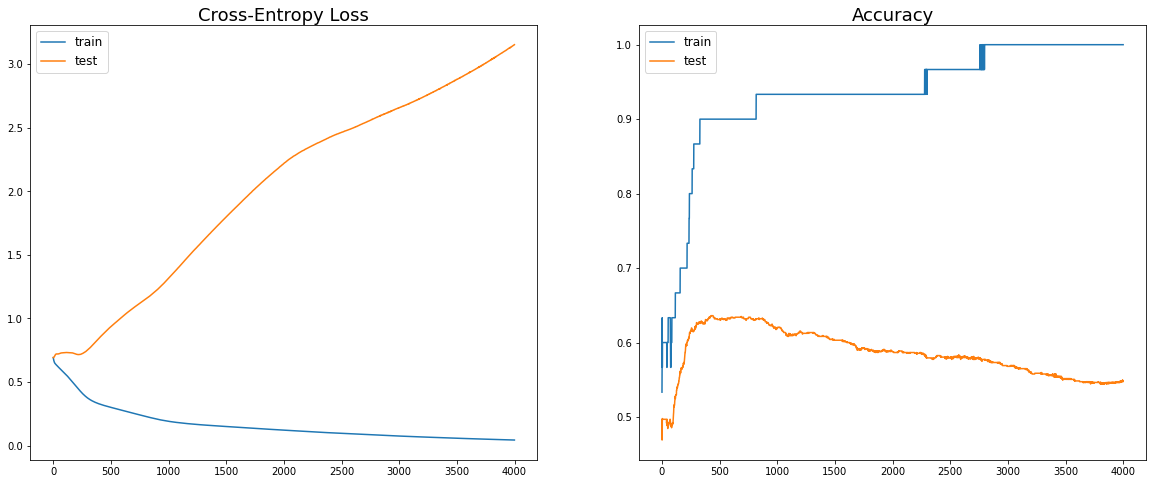

In [ ]:
# mlp overfit on the two circles dataset
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import plt
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[: n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#seed
np.random.seed(42)
tf.random.set_seed(42)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=2000, verbose=0) 
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 18)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 18)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(fontsize = 12)
plt.show()

## 5.2. MLP With Input Layer Noise

Train: 0.933, Test: 0.581


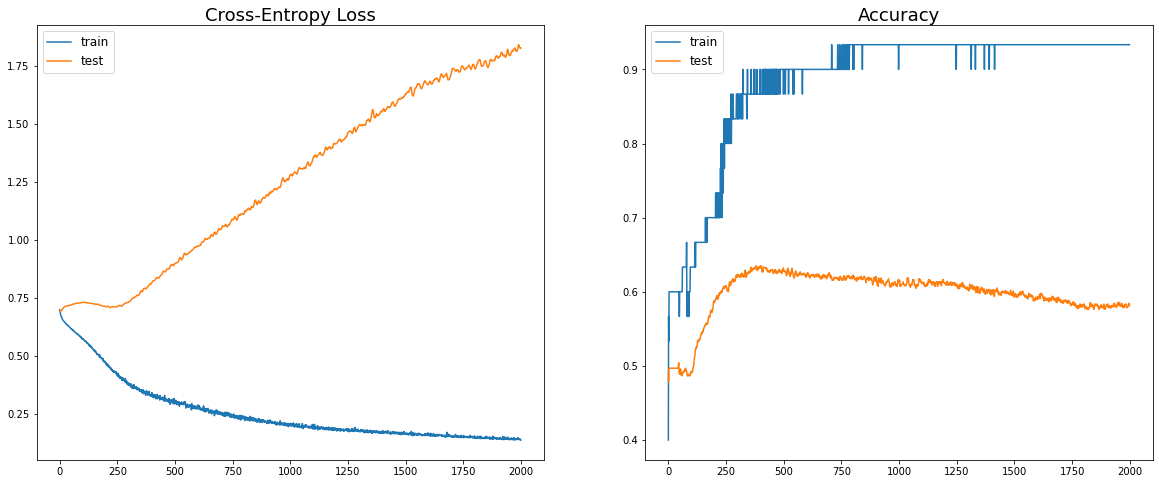

In [ ]:
# mlp overfit on the two circles dataset with input noise
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GaussianNoise
from matplotlib import plt
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(GaussianNoise(0.01, input_shape=(2,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#seed
np.random.seed(42)
tf.random.set_seed(42)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=2000, verbose=0) 
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 18)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 18)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(fontsize = 12)
plt.show()

## 5.3. MLP With Hidden Layer Noise

### 5.3.1. Before activation

Train: 0.867, Test: 0.634


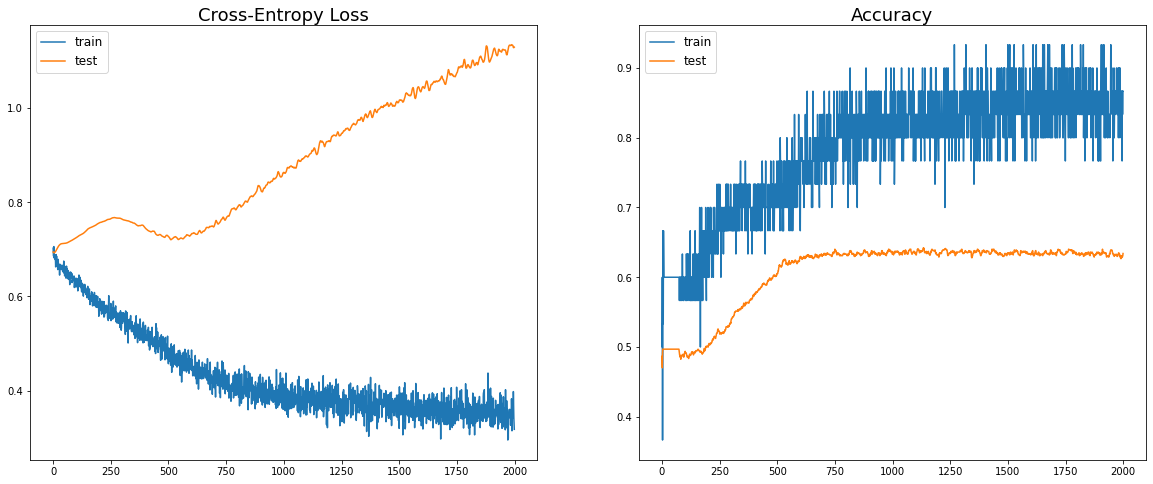

In [ ]:
# mlp overfit on the two circles dataset with hidden layer noise
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import GaussianNoise
from matplotlib import plt
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2))
model.add(GaussianNoise(0.1))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#seed
np.random.seed(42)
tf.random.set_seed(42)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=2000, verbose=0) # evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 18)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 18)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(fontsize = 12)
plt.show()

### 5.3.2. After activation

Train: 0.967, Test: 0.843


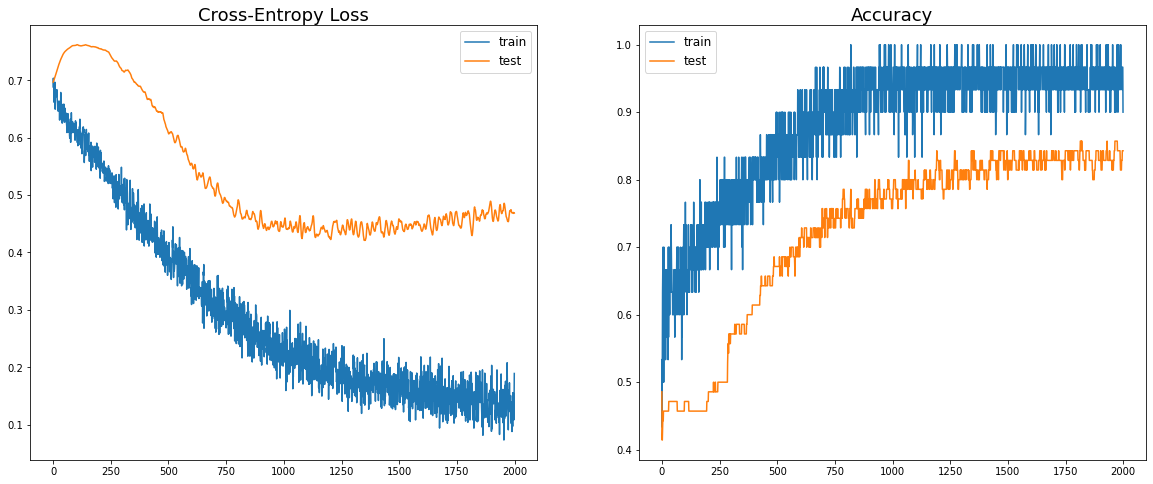

In [ ]:
# mlp overfit on the two circles dataset with hidden layer noise (alternate)
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GaussianNoise
from matplotlib import plt
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(GaussianNoise(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#seed
np.random.seed(42)
tf.random.set_seed(42)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=2000, verbose=0) 
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 18)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 18)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(fontsize = 12)
plt.show()

## 5.4. Extensions
- **Repeated Evaluation**. Update the example to use repeated evaluation of the model with and without noise and report performance as the mean and standard deviation over repeats.
- **Grid Search Standard Deviation**. Develop a grid search in order to discover the amount of noise that reliably results in the best performing model.
- **Input and Hidden Noise**. Update the example to introduce noise at both the input and hidden layers of the model.

# **6. Halt Training at the Right Time with Early Stopping**

- Monitoring model performance. 
- Trigger to stop training.
- The choice of model to use.

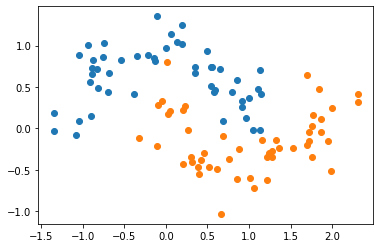

In [ ]:
# scatter plot of moons dataset
from sklearn.datasets import make_moons
from matplotlib import plt
from numpy import where
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# scatter plot for each class value
for class_value in range(2):
  # select indices of points with the class label
  row_ix = where(y == class_value)
  # scatter plot for points with a different color
  plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
plt.show()

## 6.1. Overfit Multilayer Perceptron

Train: 1.000, Test: 0.914


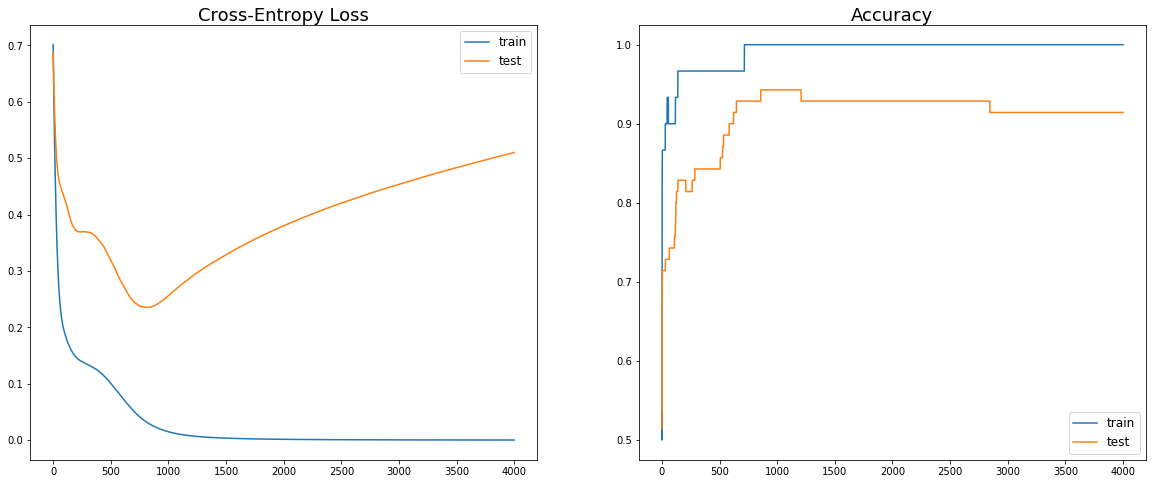

In [ ]:
# mlp overfit on the moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import plt
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


#seed
np.random.seed(42)
tf.random.set_seed(42)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0) 
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 18)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 18)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(fontsize = 12)
plt.show()

## 6.2. Overfit MLP With Early Stopping

Train: 0.500, Test: 0.514


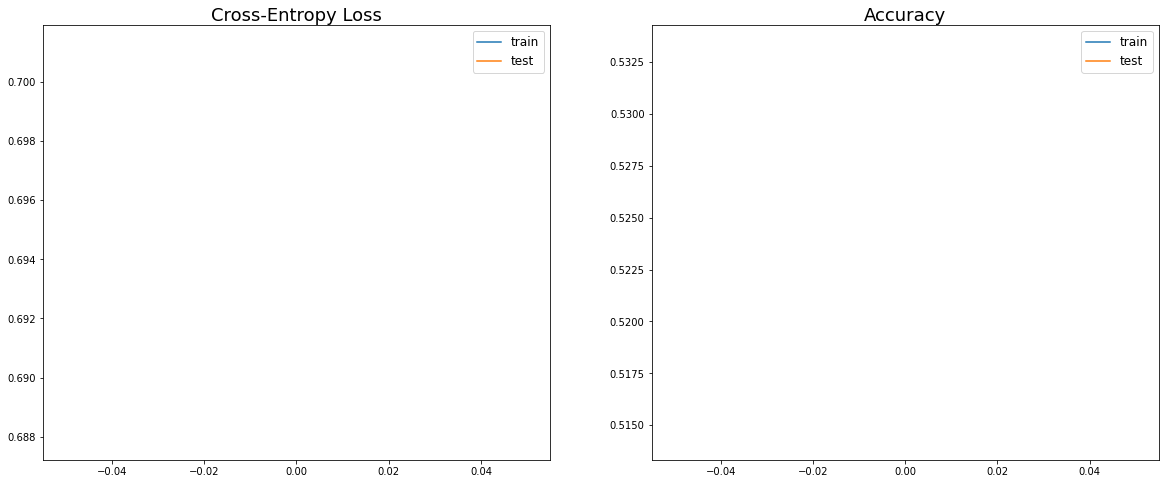

In [ ]:
# mlp overfit on the moons dataset with simple early stopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import plt
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#seed
np.random.seed(42)
tf.random.set_seed(42)

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0,
    callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0) 
_, test_acc = model.evaluate(testX, testy, verbose=0) 
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc)) 

# plot loss learning curves
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 18)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 18)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(fontsize = 12)
plt.show()

## 6.3. Patient early stopping

Epoch 01013: early stopping
Train: 1.000, Test: 0.943


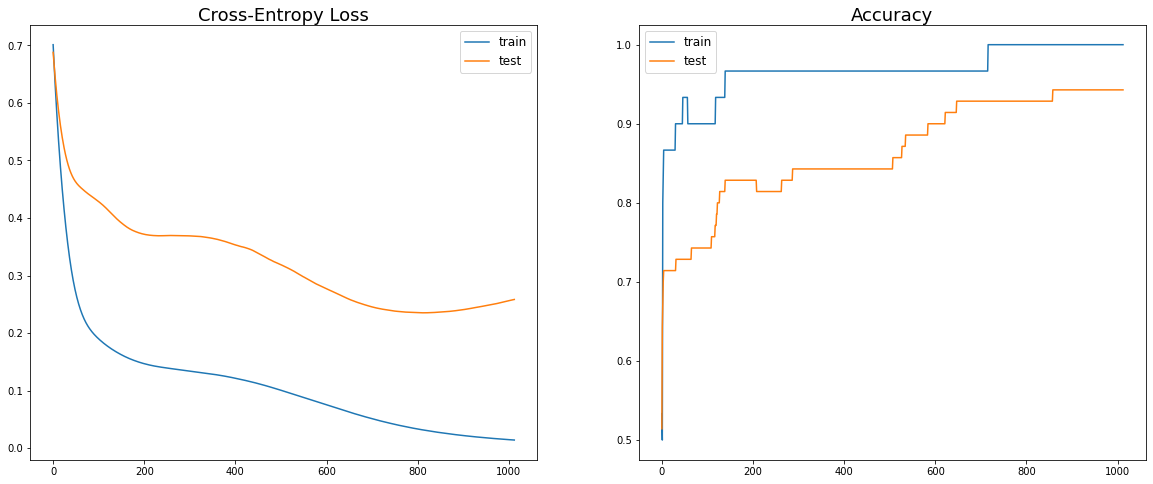

In [ ]:
# mlp overfit on the moons dataset with patient early stopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import plt
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0,
    callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0) 
_, test_acc = model.evaluate(testX, testy, verbose=0) 
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc)) 

# plot loss learning curves
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 18)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 18)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(fontsize = 12)
plt.show()

## 6.4. Patient early stopping and model checkpointing



Epoch 00001: val_accuracy improved from -inf to 0.51429, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.51429 to 0.64286, saving model to best_model.h5

Epoch 00003: val_accuracy improved from 0.64286 to 0.67143, saving model to best_model.h5

Epoch 00004: val_accuracy improved from 0.67143 to 0.70000, saving model to best_model.h5

Epoch 00005: val_accuracy improved from 0.70000 to 0.71429, saving model to best_model.h5

Epoch 00006: val_accuracy did not improve from 0.71429

Epoch 00007: val_accuracy did not improve from 0.71429

Epoch 00008: val_accuracy did not improve from 0.71429

Epoch 00009: val_accuracy did not improve from 0.71429

Epoch 00010: val_accuracy did not improve from 0.71429

Epoch 00011: val_accuracy did not improve from 0.71429

Epoch 00012: val_accuracy did not improve from 0.71429

Epoch 00013: val_accuracy did not improve from 0.71429

Epoch 00014: val_accuracy did not improve from 0.71429

Epoch 00015: val_accuracy did not improve f

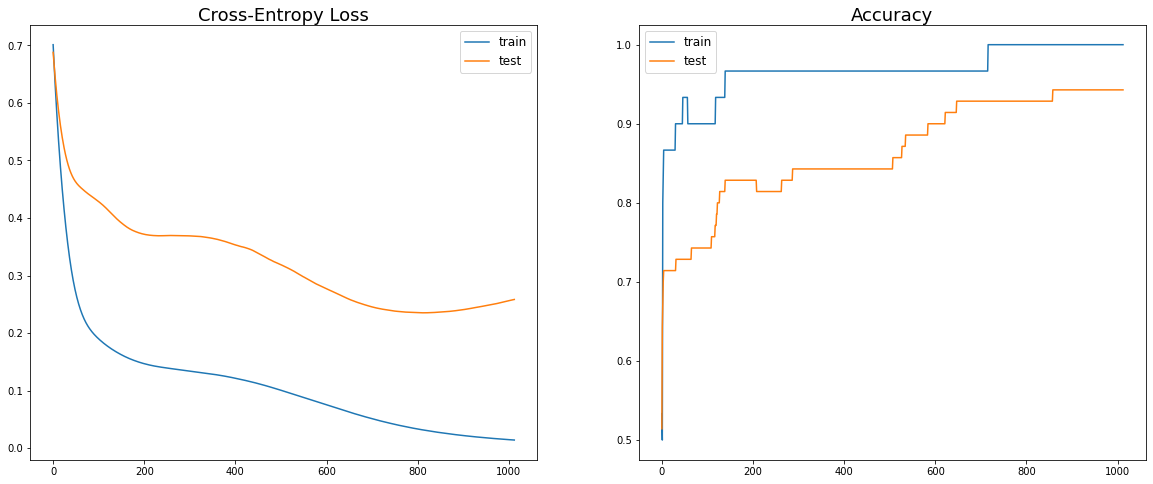

In [ ]:
# mlp overfit on the moons dataset with patient early stopping and model checkpointing
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # simple early stopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1,
    save_best_only=True)


#seed
np.random.seed(42)
tf.random.set_seed(42)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0,
    callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0) 
_, test_acc = saved_model.evaluate(testX, testy, verbose=0) 
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot loss learning curves
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title('Cross-Entropy Loss', pad=-40, fontsize = 18)
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(fontsize = 12)
# plot accuracy learning curves
plt.subplot(122)
plt.title('Accuracy', pad=-40, fontsize = 18)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(fontsize = 12)
plt.show()

## 6.5. Extensions
- **Use Accuracy**. Update the example to monitor accuracy on the test dataset rather than loss, and plot learning curves showing accuracy.
- **Use True Validation Set**. Update the example to split the training set into train and validation sets, then evaluate the model on the test dataset.
- **Regression Example**. Create a new example of using early stopping to address overfitting on a simple regression problem and monitoring mean squared error.